## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [2]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [5]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [8]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 0.01
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.95, 0.85, 0.75, 0.65, 0.55]

In [9]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for momentum in MOMENTUM:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with MOMENTUM = %.6f" % (momentum))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=momentum)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-momentum-%s" % str(momentum)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with MOMENTUM = 0.950000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [======================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 4s 79us/step - loss: 1.8817 - acc: 0.3298 - val_loss: 1.8060 - val_acc: 0.3506
Epoch 2/50
50000/50000 [==============================] - 4s 74us/step - loss: 1.6759 - acc: 0.4080 - val_loss: 1.6569 - val_acc: 0.4151
Epoch 3/50
50000/50000 [==============================] - 4s 74us/step - loss: 1.5887 - acc: 0.4382 - val_loss: 1.5881 - val_acc: 0.4336
Epoch 4/50
50000/50000 [==============================] - 4s 73us/step - loss: 1.5324 - acc: 0.4580 - val_loss: 1.5507 - val_acc: 0.4493
Epoch 5/50
50000/50000 [==============================] - 4s 74us/step - loss: 1.4844 - acc: 0.4750 - val_loss: 1.6814 - val_acc: 0.3945
Epoch 6/50
50000/50000 [==============================] - 4s 73us/step - loss: 1.4416 - acc: 0.4900 - val_loss: 1.4725 - val_acc: 0.4736
Epoch 7/50
50000/50000 [==============================] - 4s 74us/step - loss: 1.4087 - acc: 0.5048 - val_loss: 1.5703 - val_acc

50000/50000 [==============================] - 4s 72us/step - loss: 1.7413 - acc: 0.3855 - val_loss: 1.7273 - val_acc: 0.3883
Epoch 3/50
50000/50000 [==============================] - 4s 72us/step - loss: 1.6570 - acc: 0.4162 - val_loss: 1.6682 - val_acc: 0.3944
Epoch 4/50
50000/50000 [==============================] - 4s 72us/step - loss: 1.5972 - acc: 0.4366 - val_loss: 1.6064 - val_acc: 0.4253
Epoch 5/50
50000/50000 [==============================] - 4s 72us/step - loss: 1.5506 - acc: 0.4517 - val_loss: 1.6169 - val_acc: 0.4255
Epoch 6/50
50000/50000 [==============================] - 4s 72us/step - loss: 1.5103 - acc: 0.4645 - val_loss: 1.6365 - val_acc: 0.4302
Epoch 7/50
50000/50000 [==============================] - 4s 72us/step - loss: 1.4781 - acc: 0.4753 - val_loss: 1.5793 - val_acc: 0.4306
Epoch 8/50
50000/50000 [==============================] - 4s 72us/step - loss: 1.4468 - acc: 0.4880 - val_loss: 1.6325 - val_acc: 0.4100
Epoch 9/50
50000/50000 [============================

50000/50000 [==============================] - 4s 74us/step - loss: 1.7008 - acc: 0.3978 - val_loss: 1.7275 - val_acc: 0.3685
Epoch 4/50
50000/50000 [==============================] - 4s 74us/step - loss: 1.6479 - acc: 0.4187 - val_loss: 1.6569 - val_acc: 0.4078
Epoch 5/50
50000/50000 [==============================] - 4s 75us/step - loss: 1.6016 - acc: 0.4343 - val_loss: 1.5679 - val_acc: 0.4493
Epoch 6/50
50000/50000 [==============================] - 4s 74us/step - loss: 1.5681 - acc: 0.4474 - val_loss: 1.6943 - val_acc: 0.4084
Epoch 7/50
50000/50000 [==============================] - 4s 74us/step - loss: 1.5375 - acc: 0.4579 - val_loss: 1.6046 - val_acc: 0.4293: 0.458 - ETA: 0s - loss: 1.5357 - 
Epoch 8/50
50000/50000 [==============================] - 4s 74us/step - loss: 1.5060 - acc: 0.4683 - val_loss: 1.5742 - val_acc: 0.4283
Epoch 9/50
50000/50000 [==============================] - 4s 73us/step - loss: 1.4813 - acc: 0.4778 - val_loss: 1.5351 - val_acc: 0.4592
Epoch 10/50
50000

50000/50000 [==============================] - 4s 73us/step - loss: 1.6861 - acc: 0.4064 - val_loss: 1.7986 - val_acc: 0.3619
Epoch 5/50
50000/50000 [==============================] - 4s 74us/step - loss: 1.6425 - acc: 0.4212 - val_loss: 1.7185 - val_acc: 0.3950loss: 1.6428 - acc: 0.421
Epoch 6/50
50000/50000 [==============================] - 4s 73us/step - loss: 1.6079 - acc: 0.4319 - val_loss: 1.6423 - val_acc: 0.4228
Epoch 7/50
50000/50000 [==============================] - 4s 74us/step - loss: 1.5736 - acc: 0.4463 - val_loss: 1.5906 - val_acc: 0.4347
Epoch 8/50
50000/50000 [==============================] - 4s 73us/step - loss: 1.5482 - acc: 0.4534 - val_loss: 1.5851 - val_acc: 0.4406
Epoch 9/50
50000/50000 [==============================] - 4s 73us/step - loss: 1.5206 - acc: 0.4627 - val_loss: 1.7294 - val_acc: 0.3774
Epoch 10/50
50000/50000 [==============================] - 4s 74us/step - loss: 1.5020 - acc: 0.4699 - val_loss: 1.5849 - val_acc: 0.4318
Epoch 11/50
50000/50000 [=

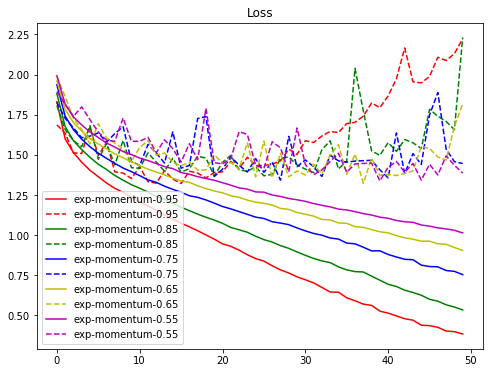

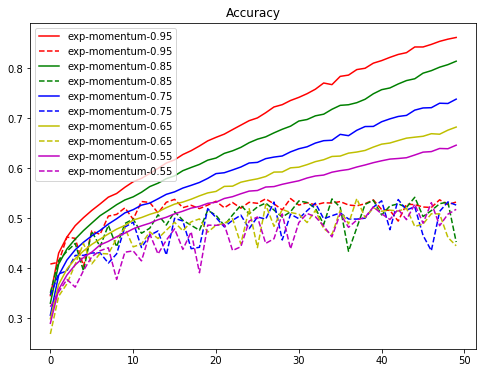

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()